In [1]:
# Calcula un índice de vulnerabilidad socioeconómica global

import numpy as np
import pandas as pd

import geopandas as gpd
import geoviews as gv

import geoviews.feature as gf

gv.extension("matplotlib")
gv.output( size = 600 )

def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.85*b, w, 0.05*h])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
data_d = "../results/"
iso = "../../Bases_de_datos/Country_ISO_code.csv"
path_r = "../results/"

# Relación de códigos Banco Mundial y Natural Earth (ISO 3166-2)
code_path = "../../Bases_de_datos/Subnational_Code_WB_ISO.csv"

# Catálogo de datos
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Tabla base
df_iso = pd.read_csv(iso).rename(columns = {"alpha-3": ix}).set_index(ix)

df_c.head()

,Dataset,ID,Origin,Countries,Granularity,Timestep,Annex,Website,Filename,Path
0,Exposure to sea level rise,pone.0118571.s004,Neumann et al.,All,National,Periods,NaN,https://doi.org/10.1371/journal.pone.0118571,pone.0118571.s004.csv,Bases_de_datos/Sea_level_rise/
1,Air Emissions Accounts,DF_AEA,OECD,All,National,"OECD: Quarterly, Non-OECD: Yearly",NaN,https://data-explorer.oecd.org,"OECD.SDD.NAD.SEEA,DSD_AEA@DF_AEA,1.0+all.csv",Bases_de_datos/OECD_Air_and_Climate/
2,Air emissions - Air pollutants Inventories,DF_AIR_EMISSIONS,OECD,All,National,Yearly,Air Emissions Correspondance Table.xlsx,https://data-explorer.oecd.org,"OECD.ENV.EPI,DSD_AIR_EMISSIONS@DF_AIR_EMISSION...",Bases_de_datos/OECD_Air_and_Climate/
3,Air emissions - Greenhouse gas emissions Inven...,DF_AIR_GHG,OECD,All,National,Yearly,NaN,https://data-explorer.oecd.org,"OECD.ENV.EPI,DSD_AIR_GHG@DF_AIR_GHG,1.0+all.csv",Bases_de_datos/OECD_Air_and_Climate/
4,Air transport CO2 emissions (experimental),DF_AIR_TRANSPORT,OECD,All,National,Monthly,NaN,https://data-explorer.oecd.org,"OECD.SDD.NAD.SEEA,DSD_AIR_TRANSPORT@DF_AIR_TRA...",Bases_de_datos/OECD_Air_and_Climate/


:Polygons   [Longitude,Latitude]   (HDI)
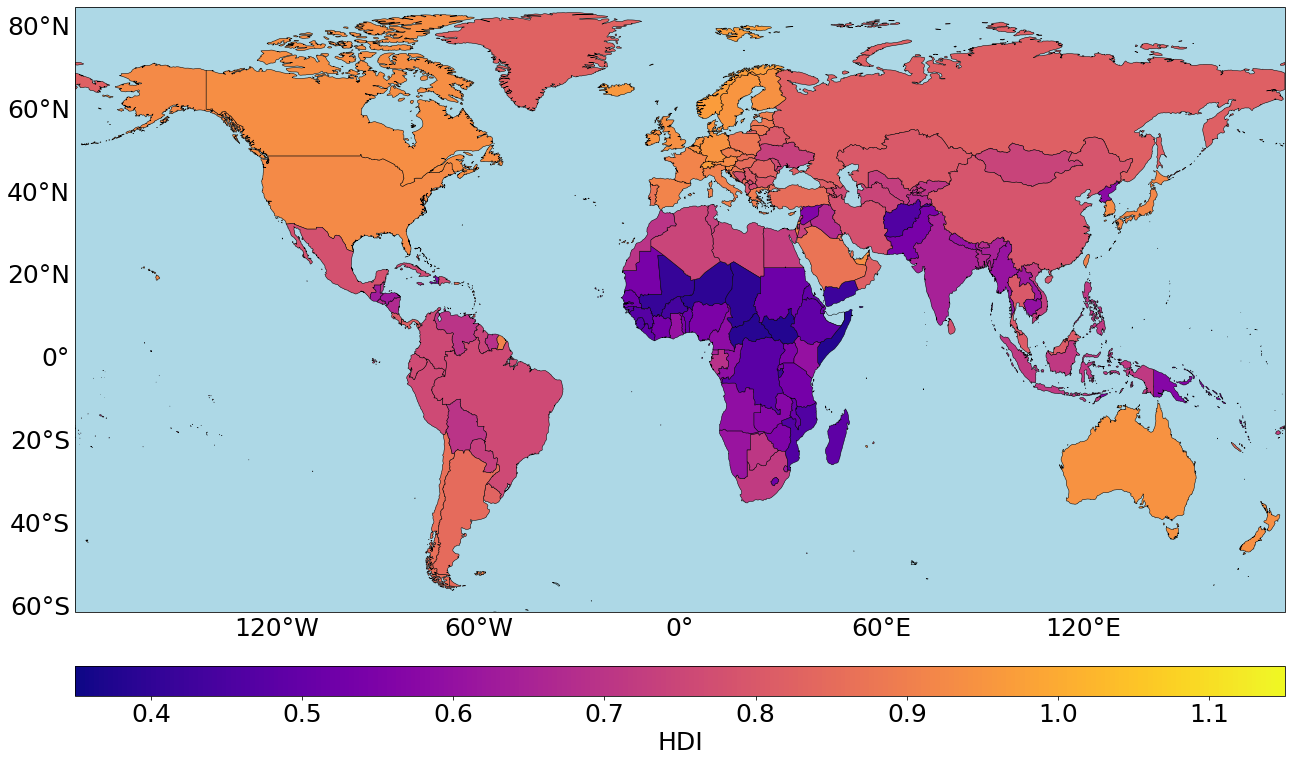

Sin datos: 0 países


,Name,HDI,GDI,SVN_A3
ISO_A3,,,,
CXR,Christmas Island,0.310,NaN,AUS
SOM,Somalia,0.380,0.769,SOM
SSD,South Sudan,0.381,0.843,SSD
CAF,Central African Republic,0.387,0.810,CAF
NER,Niger,0.394,0.826,NER
TCD,Chad,0.394,0.776,TCD
MLI,Mali,0.410,0.830,MLI
BDI,Burundi,0.420,0.926,BDI
YEM,Yemen,0.424,0.456,YEM


In [3]:
# Nombres de variables a usar
vars = ["HDI", "GDI",
    "Scientific Production per Capita",
    "Total debt service [% of GNI]",
    "Central government debt [% of GDP]",
    "Gini Coefficient"]
var_i = [v + "_index" for v in vars]

# Primeras dos categorías
id = "GDI_HDI"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])

i = 0

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 0.05 * np.floor( borders[vars[i]].min() * 20 )
max = 0.05 * np.ceil( borders[vars[i]].max() * 20 )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)


:Polygons   [Longitude,Latitude]   (GDI)
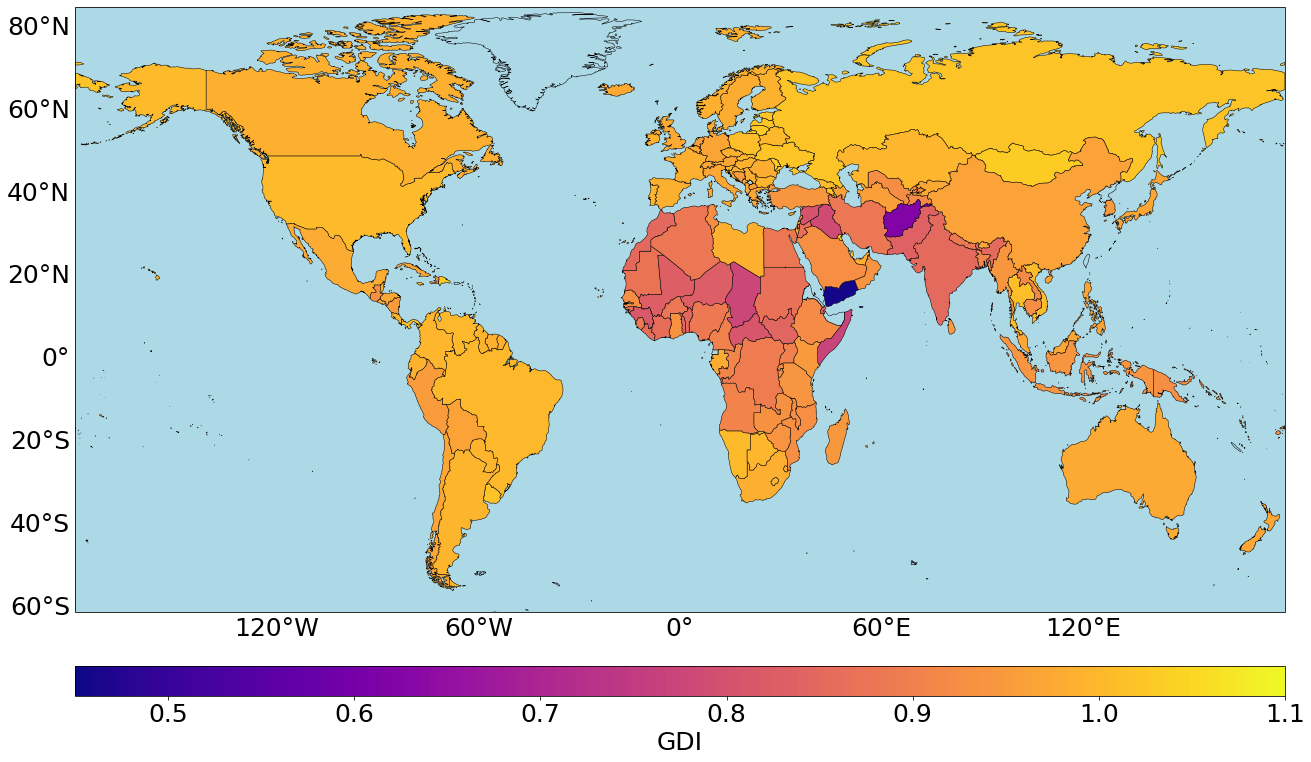

Sin datos: 50 países


,Name,HDI,GDI,SVN_A3
ISO_A3,,,,
YEM,Yemen,0.424,0.456,YEM
AFG,Afghanistan,0.462,0.622,AFG
SOM,Somalia,0.380,0.769,SOM
TCD,Chad,0.394,0.776,TCD
IRQ,Iraq,0.673,0.786,IRQ
SYR,Syrian Arab Republic,0.557,0.805,SYR
CAF,Central African Republic,0.387,0.810,CAF
GIN,Guinea,0.471,0.818,GIN
NER,Niger,0.394,0.826,NER


In [4]:
i = 1

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 0.05 * np.floor( borders[vars[i]].min() * 20 )
max = 0.05 * np.ceil( borders[vars[i]].max() * 20 )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)

:Polygons   [Longitude,Latitude]   (Scientific Production per Capita)
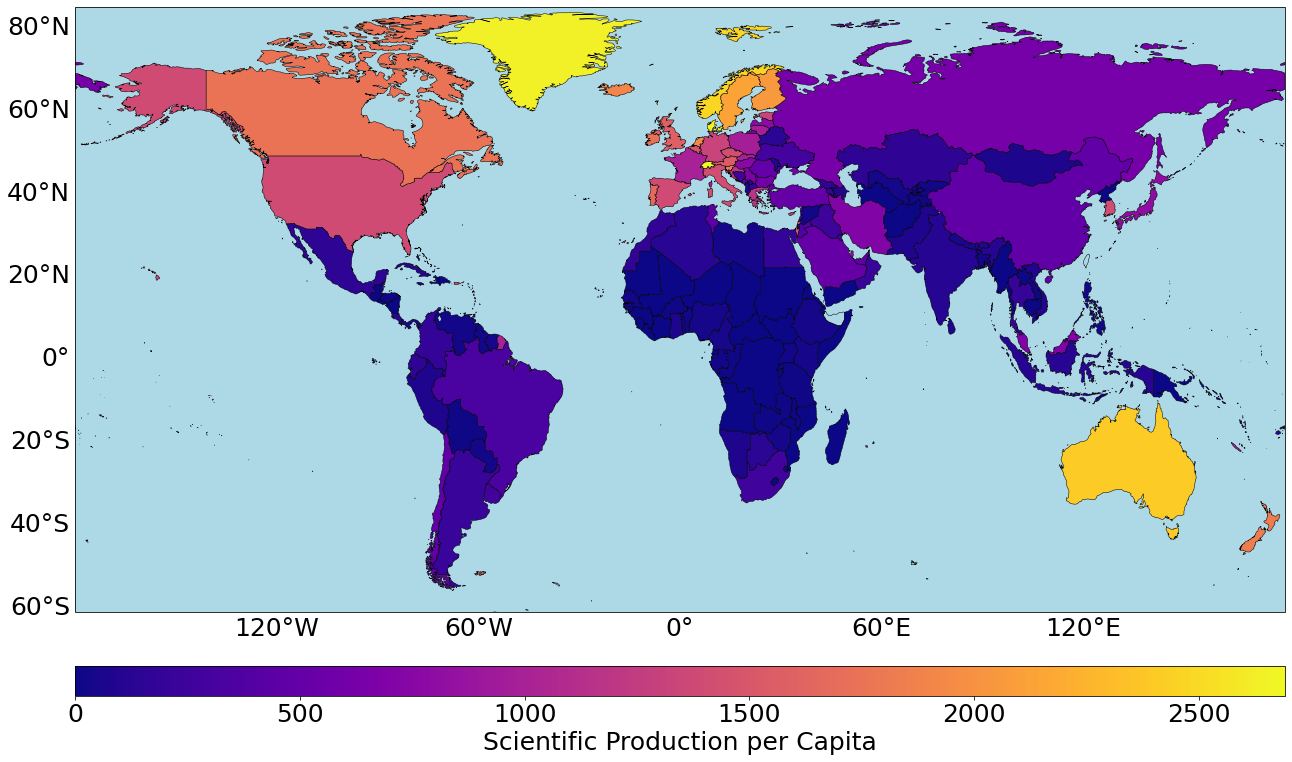

Sin datos: 3 países


,ISO_A3,Name,HDI,GDI,Scientific Production per Capita,POP_EST
SVN_A3,,,,,,
TCD,TCD,Chad,0.394,0.776,0.882304,15946876.0
TKM,TKM,Turkmenistan,0.744,0.956,0.925600,5942089.0
GNQ,GNQ,Equatorial Guinea,0.650,NaN,1.253700,1355986.0
SSD,SSD,South Sudan,0.381,0.843,1.289989,11062113.0
AGO,AGO,Angola,0.591,0.905,1.426852,31825295.0
COD,COD,Congo (Democratic Republic of the),0.481,0.891,1.979017,86790567.0
LBR,LBR,Liberia,0.487,0.860,2.444619,4937374.0
SLV,SLV,El Salvador,0.674,0.972,2.629559,6453553.0
NER,NER,Niger,0.394,0.826,2.730504,23310715.0


In [5]:
id = "IP.JRN.ARTC.SC"
i = 2

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
#df = df.reset_index().set_index(ix)
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df["POP_EST"] = borders["POP_EST"]
df[vars[i]] = df[vars[i]] / df["POP_EST"] * 1e6

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = np.floor( borders[vars[i]].min() )
max = np.ceil( borders[vars[i]].max() )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)

:Polygons   [Longitude,Latitude]   (Total debt service [% of GNI])
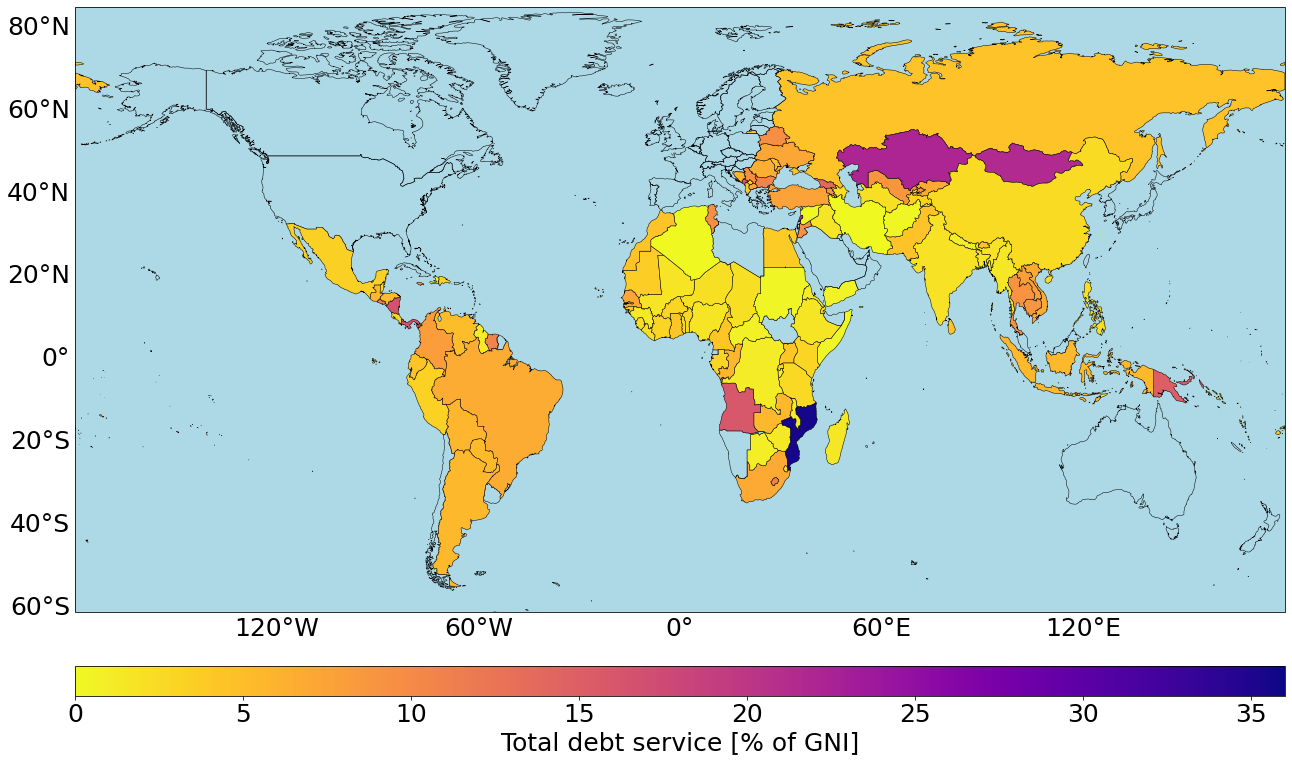

Sin datos: 116 países


,ISO_A3,Name,HDI,GDI,Scientific Production per Capita,POP_EST,Total debt service [% of GNI]
SVN_A3,,,,,,,
SYR,SYR,Syrian Arab Republic,0.557,0.805,26.553393,17070135.0,0.005096
IRN,IRN,Iran (Islamic Republic of),0.780,0.880,696.569162,82913906.0,0.068134
DZA,DZA,Algeria,0.745,0.881,132.139755,43053054.0,0.139630
AFG,AFG,Afghanistan,0.462,0.622,3.147594,38041754.0,0.176546
SOM,SOM,Somalia,0.380,0.769,3.211242,10192317.3,0.188488
HTI,HTI,Haiti,0.552,0.929,3.569185,11263077.0,0.229370
SDN,SDN,Sudan,0.516,0.868,8.838154,42813238.0,0.368343
COM,COM,Comoros,0.586,0.914,3.995835,850886.0,0.383949
TLS,TLS,Timor-Leste,0.566,0.904,9.179356,1293119.0,0.460328


In [6]:
id = "DT.TDS.DECT.GN.ZS"
i = 3

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = np.floor( borders[vars[i]].min() )
max = np.ceil( borders[vars[i]].max() )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)

:Polygons   [Longitude,Latitude]   (Central government debt [% of GDP])
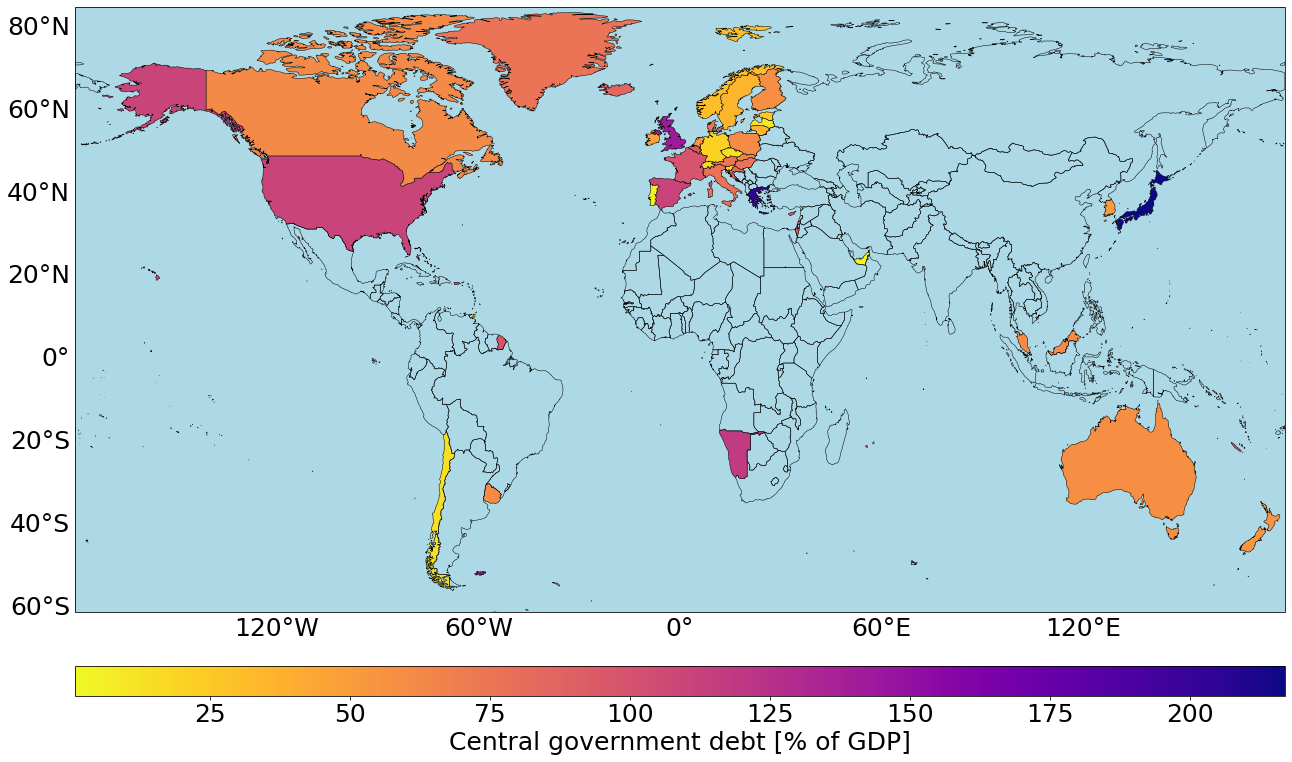

Sin datos: 146 países


,ISO_A3,Name,HDI,GDI,Scientific Production per Capita,POP_EST,Total debt service [% of GNI],Central government debt [% of GDP]
SVN_A3,,,,,,,,
ARE,ARE,United Arab Emirates,0.937,0.986,454.757363,9770529.0,NaN,1.845685
LUX,LUX,Luxembourg,0.927,0.993,1527.578820,619896.0,NaN,2.901345
PRT,PRT,Portugal,0.874,0.998,1665.031228,10269417.0,NaN,5.657405
LVA,LVA,Latvia,0.879,1.022,768.171502,1912789.0,NaN,10.263185
CHL,CHL,Chile,0.860,0.973,473.816589,18952038.0,NaN,13.145640
CZE,CZE,Czechia,0.895,0.988,1405.286686,10669709.0,NaN,14.096377
TTO,TTO,Trinidad and Tobago,0.814,0.992,170.175337,1394973.0,NaN,15.928004
SVN,SVN,Slovenia,0.926,0.999,1833.141279,2087946.0,NaN,16.248048
CHE,CHE,Switzerland,0.967,0.971,2691.019486,8574832.0,NaN,17.802864


In [7]:
id = "GC.DOD.TOTL.GD.ZS"
i = 4

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df[vars[i]] = df[vars[i]].where( df[vars[i-1]].isnull(), np.nan )

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = np.floor( borders[vars[i]].min() )
max = np.ceil( borders[vars[i]].max() )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)

:Polygons   [Longitude,Latitude]   (Gini Coefficient)
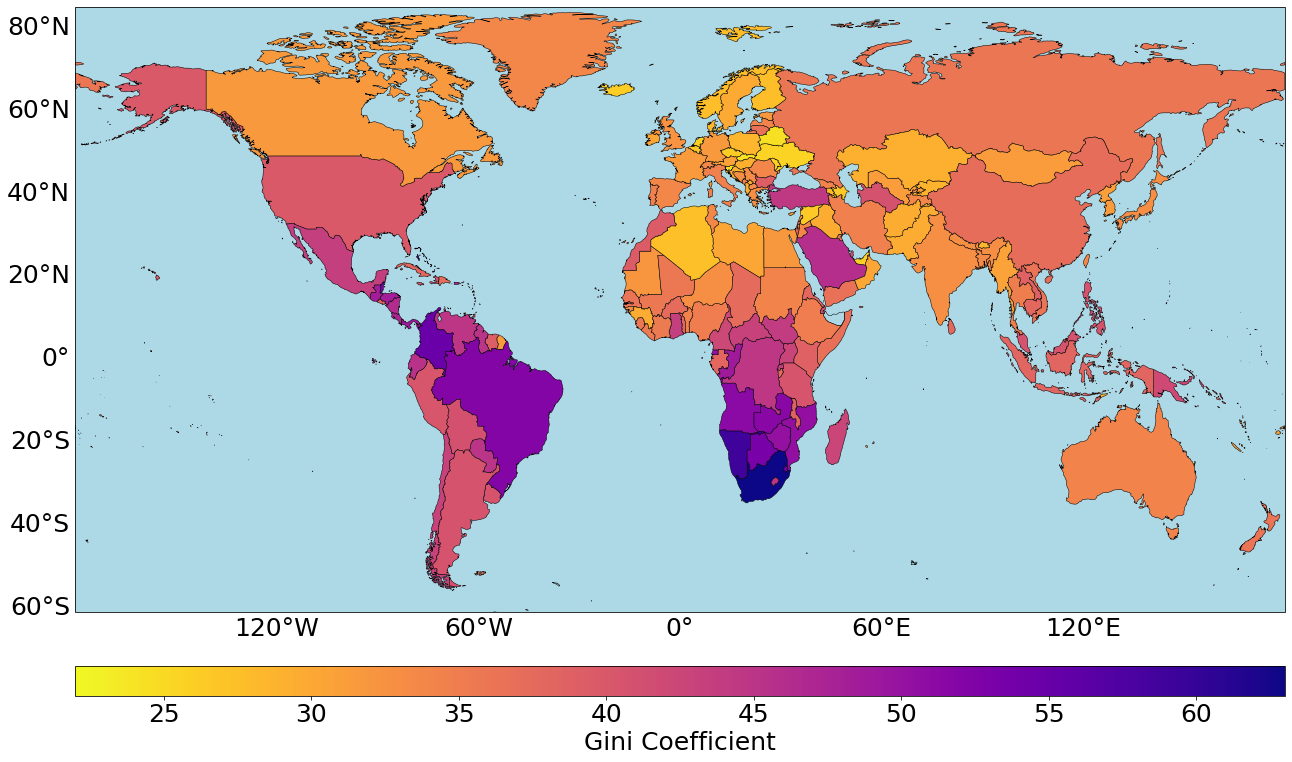

Sin datos: 0 países


,SVN_A3,Name,HDI,GDI,Scientific Production per Capita,POP_EST,Total debt service [% of GNI],Central government debt [% of GDP],Gini Coefficient
ISO_A3,,,,,,,,,
FRO,DNK,Faroe Islands,0.899,NaN,2632.702667,5818553.0,NaN,75.261570,22.7
VGB,GBR,British Virgin Islands,0.823,NaN,1579.492927,66834405.0,NaN,142.283042,23.0
SVK,SVK,Slovakia,0.855,1.002,993.765577,5454073.0,NaN,64.507132,24.1
SVN,SVN,Slovenia,0.926,0.999,1833.141279,2087946.0,NaN,16.248048,24.3
BLR,BLR,Belarus,0.801,1.003,142.825665,9466856.0,9.606008,NaN,24.4
UKR,UKR,Ukraine,0.734,1.021,287.863138,44385155.0,7.234969,NaN,25.6
ALA,FIN,Aland,0.932,NaN,2052.131455,5520314.0,NaN,58.247410,25.6
NLD,NLD,Netherlands,0.946,0.960,1925.638888,17332850.0,NaN,54.294443,25.7
MDA,MDA,Moldova (Republic of),0.763,1.033,102.196049,2657637.0,4.732956,NaN,25.7


In [8]:
id = "SI.POV.GINI"
i = 5

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0][:-4] + "_extra.csv",
    skiprows = 4 ).rename( columns = {"Country Code": ix}
    ).drop(columns = ["Source"])
df = df.reset_index().set_index(ix)
df[vars[i]] = df_i.set_index(ix).iloc[ :, 4: ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = np.floor( borders[vars[i]].min() )
max = np.ceil( borders[vars[i]].max() )
map = gv.Polygons( borders, vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df.sort_values(vars[i]).head(10)

In [9]:
index_n = "Socioeconomic vulnerability index"

df = df.reset_index().set_index(ix)

var_i = [v + "_index" for v in vars]
for i, v in enumerate(vars):
    min_v = df[v].min()
    max_v = df[v].max()
    rng_v = max_v - min_v
    df[ var_i[i] ] = 10 * ( df[v] - min_v ) / rng_v
    if v in vars[0:3]: df[ var_i[i] ] = 10 - df[ var_i[i] ]

df[index_n] = df[var_i].mean(axis = 1)
min_v = df[index_n].min()
max_v = df[index_n].max()
rng_v = max_v - min_v
df[ index_n ] = 10 * ( df[index_n] - min_v ) / rng_v

df.to_csv(path_r + "socioeconomic_index.csv")

df.sort_values(index_n, ascending = False)#.head(10)

,SVN_A3,Name,HDI,GDI,Scientific Production per Capita,POP_EST,Total debt service [% of GNI],Central government debt [% of GDP],Gini Coefficient,HDI_index,GDI_index,Scientific Production per Capita_index,Total debt service [% of GNI]_index,Central government debt [% of GDP]_index,Gini Coefficient_index,Socioeconomic vulnerability index
ISO_A3,,,,,,,,,,,,,,,,
GNQ,GNQ,Equatorial Guinea,0.650,NaN,1.253700,1355986.0,NaN,NaN,50.20,5.717884,NaN,9.998619,NaN,NaN,6.823821,10.000000
MOZ,MOZ,Mozambique,0.461,0.929,5.709339,30366036.0,35.564801,NaN,50.50,8.098237,2.220395,9.982057,10.000000,NaN,6.898263,9.882641
SSD,SSD,South Sudan,0.381,0.843,1.289989,11062113.0,NaN,NaN,44.10,9.105793,3.634868,9.998485,NaN,NaN,5.310174,9.201509
ATG,ATG,Antigua and Barbuda,0.826,NaN,75.063325,97118.0,NaN,NaN,48.00,3.501259,NaN,9.724248,NaN,NaN,6.277916,8.386960
YEM,YEM,Yemen,0.424,0.456,9.690719,29161922.0,0.530089,NaN,36.70,8.564232,10.000000,9.967257,0.147637,NaN,3.473945,8.274580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRO,DNK,Faroe Islands,0.899,NaN,2632.702667,5818553.0,NaN,75.261570,22.70,2.581864,NaN,0.216780,NaN,3.424764,0.000000,0.506939
SVN,SVN,Slovenia,0.926,0.999,1833.141279,2087946.0,NaN,16.248048,24.30,2.241814,1.069079,3.188976,NaN,0.671853,0.397022,0.439850
CHE,CHE,Switzerland,0.967,0.971,2691.019486,8574832.0,NaN,17.802864,33.70,1.725441,1.529605,0.000000,NaN,0.744384,2.729529,0.172220


:Polygons   [Longitude,Latitude]   (Socioeconomic vulnerability index)
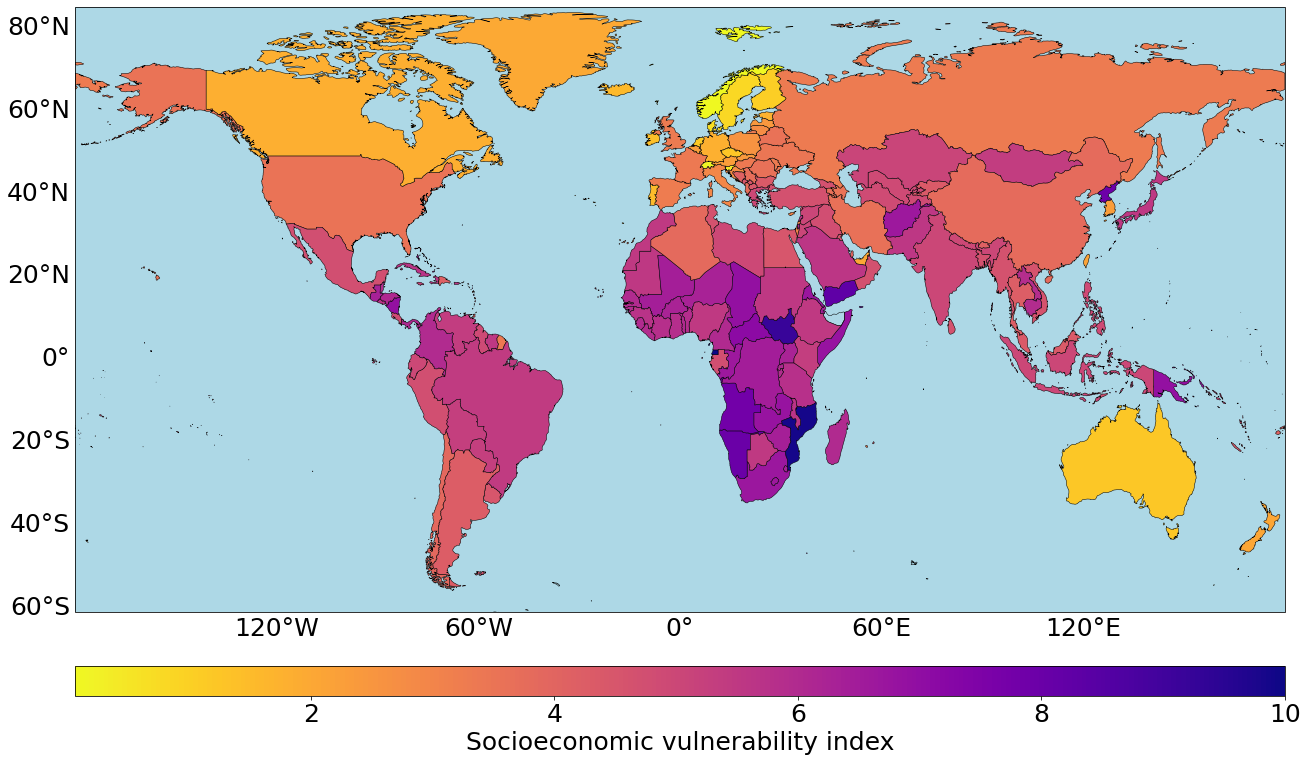

In [10]:
borders[index_n] = df[index_n]

def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.85*b, w, 0.05*h])

map = gv.Polygons( borders, vdims = index_n ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )